Grafos
======

**Author:** Daniel R. Cassar



## Grafos



### Breve introdução sobre grafos



Grafo é uma estrutura matemática que usamos para representar um conjunto de objetos e eventuais conexões entre eles. Os objetos que compõe um grafo são chamados de *vértices* e as conexões entre estes objetos são chamadas de *arestas*. Objetos conectados são chamados de *vizinhos*.

Abaixo temos um exemplo de um grafo. Os vértices deste grafo são o conjunto $\{1, 2, 3, 4, 5, 6\}$. Estes vértices estão conectados entre si por arestas, por exemplo: o vértice $1$ está conectado aos vértices $5$ e $2$ e o vértice $6$ está conectado apenas ao vértice $4$.

![img](https://upload.wikimedia.org/wikipedia/commons/5/5b/6n-graf.svg)

Grafos são estruturas matemáticas muito importantes. Diversos problemas podem ser representados por grafos! O grafo da imagem anterior, por exemplo, poderia representar linhas de ônibus que conectam diferentes cidades. Neste caso, se estamos na cidade $2$ sabemos que podemos chegar até as cidades $5$, $3$ e $1$ se pegarmos o ônibus correto, mas não conseguimos chegar até a cidade $6$ com apenas um ônibus! Neste caso, precisamos primeiro ir até as cidades $5$ ou $3$, pegar um segundo ônibus para a cidade $4$ e finalmente um terceiro ônibus para a cidade $6$.

Este grafo da figura anterior é relativamente simples por conter poucos vértices e poucas arestas. Conseguimos visualmente planejar nossa rota de ônibus apenas olhando para o grafo. Mas e quando temos um grafo com muitos vértices e muitas arestas? Neste caso, não é tão fácil identificar um caminho possível! Sabe o que pode nos ajudar neste caso? Sim, *algoritmos de grafos*!!!



### Representando grafos em Python



Antes de investigar algoritmos de grafos precisamos primeiro representar um grafo em Python. Existem diversas formas de fazer isso, mas uma das formas mais visuais é usando uma estrutura chamada de *dicionário*. Dicionários de Python são similares a listas no sentido que eles guardam um número arbitrário de objetos. No entanto, diferentemente de listas, dicionários são formados por pares de *chave* e *valor*. Vamos ver um exemplo de como criamos um dicionário:



In [32]:
capitais = {
    # chave: valor,
    "São Paulo": "São Paulo",
    "Acre": "Rio Branco",
    "Ceará": "Fortaleza",
    "Paraná": "Curitiba",
    "Roraima": "Boa Vista",
    "Tocantins": "Palmas",
    "Minas Gerais": "Belo Horizonte",
    "Goiás": "Goiânia",
}

Dicionários são criados usando $\{\}$ e cada item do dicionário deve ter uma chave e um valor. O objeto chave é separado do objeto valor por um dois-pontos.

Dicionários, como o próprio nome sugere, servem para &ldquo;traduzir&rdquo; uma informação em outra. Podemos usar nosso dicionário, por exemplo, para facilmente checar a capital de Roraima:



In [33]:
print("A capital de Roraima é", capitais["Roraima"])

A capital de Roraima é Boa Vista


Para recuperar um valor de um dicionário, basta escrever o nome do dicionário seguido de colchetes contendo a chave de interesse.

<u>Valores</u> de dicionários podem ser qualquer objeto de Python, porém <u>chaves</u> requerem que o objeto seja imutável. Isso significa que *não* podemos usar listas nem conjuntos como chaves de dicionários.

Vamos criar um dicionário que represente o grafo da imagem abaixo.

![img](https://upload.wikimedia.org/wikipedia/commons/5/5b/6n-graf.svg)



In [34]:
grafo = {
    1: {5, 2},     # o objeto `1` está conectado aos objetos `5` e `2`.
    2: {1, 5, 3},  # o objeto `2` está conectado aos objetos `1`, `5` e `3`
    3: {4, 2},     # e assim por diante...
    4: {5, 3, 6},
    5: {1, 2, 4},
    6: {4},
}

Pronto! Nosso dicionário `grafo` está armazenando todas as informações que temos na imagem. Agora podemos fazer perguntas para nosso dicionário! Digamos que estou na cidade $4$ e quero saber quais cidades eu consigo acessar pegando apenas um ônibus. Essa resposta é bastante direta, basta checar os valores da chave em questão:



In [35]:
print("Da cidade 4 eu posso pegar um ônibus e chegar nas cidades", grafo[4])

Da cidade 4 eu posso pegar um ônibus e chegar nas cidades {3, 5, 6}


Com essa resposta, chegamos na conclusão de que podemos ir até as cidades $3$, $5$ ou $6$ usando transporte coletivo partindo da cidade $4$. Quem sabe a notação acima possa parecer um pouco confusa, quando eu escrevo `grafo[4]` neste caso eu não estou pegando o elemento da posição `4`, mas sim o valor relacionado a chave `4` do dicionário `grafo`. Você pode checar que isso é verdade tentando rodar `grafo[0]` que vai retornar em um erro pois não existe a chave `0`.

Antes de seguir em frente, vamos plotar nosso grafo! Para isso usaremos a biblioteca `networkx` que é especializada em grafos.



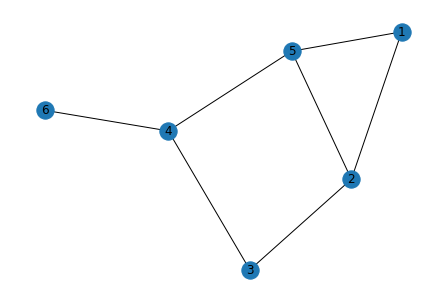

In [36]:
import networkx as nx

grafo = {
    1: {5, 2},
    2: {1, 5, 3},
    3: {4, 2},
    4: {5, 3, 6},
    5: {1, 2, 4},
    6: {4},
}

# convertendo nosso dicionário para um grafo da biblioteca `networkx`
g = nx.Graph(grafo)

# plotando!
nx.draw(g, with_labels=True)

Se você quiser embelezar seu grafo, você pode usar um dicionário de opções assim como mostra o código abaixo. <u>Nota</u>: isso é totalmente perfumaria, prefira gastar tempo entendendo o conceito e só embeleze seu grafo caso tenha vontade e tempo. Abaixo temos o operador estrela `**` que neste caso não está servindo de operador exponencial, mas sim como desempacotador do dicionário `options`. Não se preocupe com ele agora.



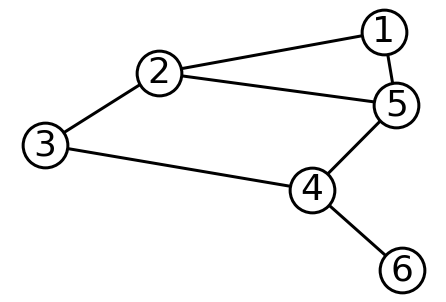

In [37]:
options = {
    "font_size": 36,
    "node_size": 2000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 3,
    "width": 3,
    "with_labels": True,
}

nx.draw(g, **options)

Vamos ver alguns problemas resolvidos abaixo.



### Problema resolvido 1



**Problema**: encontrar todas as cidades que levam até a cidade `n`.

**Entrada**:

1.  um grafo representado por um dicionário
2.  a cidade `n`

**Saída**: lista contendo todas as cidades que levam até a cidade `n`.

**Algoritmo**:



In [38]:
def encontra_cidades(grafo, n):
    """Encontra todas as cidades que levam até n."""

    resposta = []

    for chave in grafo:  # preste atenção aqui!!
        if n in grafo[chave]:
            resposta.append(chave)

    return resposta

**Teste**:



In [39]:
grafo = {
    1: {5, 2},
    2: {1, 5, 3},
    3: {4, 2},
    4: {5, 3, 6},
    5: {1, 2, 4},
    6: {4},
}

for n in grafo:
    print("Você pode chegar na cidade", n,
          "saindo das cidades", encontra_cidades(grafo,n))

Você pode chegar na cidade 1 saindo das cidades [2, 5]
Você pode chegar na cidade 2 saindo das cidades [1, 3, 5]
Você pode chegar na cidade 3 saindo das cidades [2, 4]
Você pode chegar na cidade 4 saindo das cidades [3, 5, 6]
Você pode chegar na cidade 5 saindo das cidades [1, 2, 4]
Você pode chegar na cidade 6 saindo das cidades [4]


**Comentários**:

Para entender a implementação é necessário primeiramente entender como o laço `for` opera com dicionários. Na linha `for chave in grafo` do algoritmo nós usamos o laço `for` no dicionário `grafo` e, durante cada iteração, armazenamos na variável `chave` uma das chaves do nosso dicionário. Ou seja, o `for` itera nas chaves, não nos valores!

Para cada chave que iteramos, checamos se a nossa cidade `n` está dentro do valor armazenado naquela chave. Realizamos essa tarefa com o operador `in` no comando `if n in grafo[chave]`. Se a condição desse `if` for atendida, então sabemos que a cidade armazenada em `chave` nos leva até a nossa cidade `n` e podemos adicionar o valor da variável `chave` na nossa lista `resposta`.



### Problema resolvido 2



**Problema**: listar todas as cidades que eu posso visitar partindo da cidade `n` pegando no máximo dois ônibus.

**Entrada**:

1.  um grafo representado por um dicionário com os valores sendo conjuntos
2.  a cidade `n`

**Saída**: conjunto contendo todas as cidades que eu posso visitar partindo da cidade `n` pegando no máximo dois ônibus.

**Algoritmo**:



In [40]:
def dois_busoes(grafo, n):
    """Calcula todas as cidades que podem ser visitadas com dois ônibus ou menos a partir de n"""

    # sei que posso visitar a cidade `n` pegando 0 ônibus
    resposta = {n}  # isso é um conjunto, não é um dicionário!

    # sei que posso visitar as cidades ligadas a `n` pegando 1 ônibus
    resposta = resposta.union(grafo[n])

    # as cidades que requerem `2` ônibus são resolvidas neste `for`
    for cidade_vizinha_de_n in grafo[n]:
        resposta = resposta.union(grafo[cidade_vizinha_de_n])

    return resposta

**Teste**:



In [41]:
grafo = {
    1: {5, 2},     # o objeto `1` está conectado aos objetos `5` e `2`.
    2: {1, 5, 3},  # o objeto `2` está conectado aos objetos `1`, `5` e `3`
    3: {4, 2},     # e assim por diante...
    4: {5, 3, 6},
    5: {1, 2, 4},
    6: {4},
}

for n in grafo:
    print("Saindo da cidade", n,
          "com no máximo 2 ônibus você pode visitar as cidades",
          dois_busoes(grafo,n))

Saindo da cidade 1 com no máximo 2 ônibus você pode visitar as cidades {1, 2, 3, 4, 5}
Saindo da cidade 2 com no máximo 2 ônibus você pode visitar as cidades {1, 2, 3, 4, 5}
Saindo da cidade 3 com no máximo 2 ônibus você pode visitar as cidades {1, 2, 3, 4, 5, 6}
Saindo da cidade 4 com no máximo 2 ônibus você pode visitar as cidades {1, 2, 3, 4, 5, 6}
Saindo da cidade 5 com no máximo 2 ônibus você pode visitar as cidades {1, 2, 3, 4, 5, 6}
Saindo da cidade 6 com no máximo 2 ônibus você pode visitar as cidades {3, 4, 5, 6}


**Comentários**:

Olha que interessante! Do nosso grafo nós vemos que das cidades 3, 4 e 5 nós conseguimos visitar qualquer cidade em no máximo duas viagens de ônibus. Isso não é verdade se estamos nas cidades 1, 2 ou 6.

Neste algoritmo usamos conjuntos ao invés de listas. A vantagem de usar conjuntos é que eles já eliminam os valores repetidos.



## Navegando grafos



### Busca em largura



Existem duas perguntas que usualmente surgem quando temos grafos:

1.  Existe conexão entre o vértice $A$ e o vértice $B$?
2.  Qual é o caminho mais curto entre o vértice $A$ e o vértice $B$? &ldquo;Mais curto&rdquo; neste caso significa aquele que visita menos vértices.

Estas duas perguntas podem ser respondidas usando o algoritmo de *busca em largura*. Vamos ver um exemplo.

Imagina que você tem um senso de direção similar ao do professor de Lógica Computacional (ou seja, quase nulo). Nesse caso, você só sabe *alguns* caminhos pela cidade. Por exemplo: se você está no Dalben só sabe sair de lá e ir para a Ilum e nada mais. Se você está no shopping, só sabe sair de lá e ir até a Ilum ou até o Boteco. Abaixo está a representação do grafo de todos os caminhos que você sabe. Tente desenhar esse grafo para treinar!



In [42]:
grafo = {
    "Ilum": {"Flats Ilum", "Dalben", "Shopping"},
    "Flats Ilum": {"Ilum", "Campo de futebol"},
    "Dalben": {"Ilum"},
    "Shopping": {"Ilum", "Boteco", "Campo de futebol"},
    "Campo de futebol": {"Flats Ilum", "Shopping"},
    "Boteco": {"Shopping"},
}

Digamos que você está no boteco degustando uma deliciosa porção de batata frita rústica (com direito a um suculento molho caseiro de maionese temperada) e se lembrou que esqueceu de comprar papel higiênico. Um perigo!! O Dalben está quase fechando então você precisa chegar rápido lá! Você decide que quer fazer o caminho que passa pelo menor número de locais. Por sorte, o algoritmo de *busca em largura* pode te ajudar aqui!

Veja abaixo uma implementação em Python do algoritmo de busca em largura.

**Algoritmo**:



In [43]:
def menor_distancia(grafo, onde_estou, onde_quero_chegar):
    """Calcula a menor distância (num. de vértices) de onde estou até onde quero chegar."""

    # Se os dois pontos são iguais, então você já está lá! Distância zero!
    if onde_estou == onde_quero_chegar:
        return 0

    # dicionário para armazenar as distâncias conhecidas
    distancia = {
        onde_estou: 0,
    }

    # criamos as variáveis `fila` e `visitados`. Ambas contém o vértice `onde_estou`
    fila = [onde_estou]
    visitados = [onde_estou]

    # enquanto ainda tivermos itens na fila...
    while len(fila) > 0:

        # o primeiro que entrou na fila sai primeiro! Essa é nossa posição atual.
        posicao = fila.pop(0)

        # iteramos em todos os vizinhos da nossa posição atual
        for vizinho in grafo[posicao]:

            # se o vizinho é onde eu quero chegar, então encontramos a resposta!
            # a resposta será a distância até chegar na posição atual mais 1
            if vizinho == onde_quero_chegar:

                # retornamos ao usuário o que ele pediu
                return distancia[posicao] + 1

            # se o vizinho em questão não foi ainda visitado...
            if vizinho not in visitados:

                # ... incluímos ele na fila...
                fila.append(vizinho)

                # ... e incluímos ele na lista de visitados...
                visitados.append(vizinho)

                # ... e atualizamos nosso dicionário de distâncias pois agora
                # sabemos chegar no vizinho!
                distancia[vizinho] = distancia[posicao] + 1

    # Se chegar aqui é porque não existe nenhum caminho que leve da
    # posição onde_estou até a onde_quero_chegar
    return False

**Teste**:



In [44]:
grafo = {
    "Ilum": {"Flats Ilum", "Dalben", "Shopping"},
    "Flats Ilum": {"Ilum", "Campo de futebol"},
    "Dalben": {"Ilum"},
    "Shopping": {"Ilum", "Boteco", "Campo de futebol"},
    "Campo de futebol": {"Flats Ilum", "Shopping"},
    "Boteco": {"Shopping"},
}

print("A distância do Boteco até o Dalben é",
      menor_distancia(grafo, "Boteco", "Dalben"))


print()
print("Outros testes:")
print(menor_distancia(grafo, "Boteco", "Shopping"))
print(menor_distancia(grafo, "Boteco", "Flats Ilum"))
print(menor_distancia(grafo, "Boteco", "Campo de futebol"))
print(menor_distancia(grafo, "Boteco", "Boteco"))
print(menor_distancia(grafo, "Boteco", "Parque dos Jequitibás"))

A distância do Boteco até o Dalben é 3

Outros testes:
1
3
2
0
False


Esse algoritmo garante que você visitará todos os vértices conectados ao seu vértice inicial. Não apenas isso, mas cada vez que ele chega em um vértice ainda não visitado, sabemos que ele chega com a menor distância possível.



## Exercícios



<font color=&ldquo;blue&rdquo;>Para os exercícios, preencha as células de código vazias abaixo conforme o que o exercício pede. A instrução `import` é apenas permitida para importar os módulos `math`, `random` e `time` nestes exercícios. O módulo `networkx` deve ser importado para plotar os grafos, porém deve ser utilizado apenas para isso.

<font color=&ldquo;blue&rdquo;>Para fins de pontuação, a nota máxima é atingida com 5 resoluções corretas (quaisquer). Resoluções extras são recomendadas para quem quer dar prioridade para aprender programação na Ilum ou para quem quer aumentar a chance de tirar uma nota alta (os pontos se somam até atingir o limite da nota 10). Questões bônus são consideradas questões individuais para fins da pontuação.



### Um grafo para chamar de meu



Crie um grafo usando dicionário de Python com no mínimo 5 vértices e faça um plot dele usando a biblioteca `networkx`.



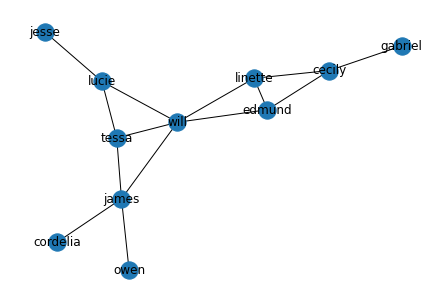

In [45]:
herondale = {
    "edmund": {"linette", "will", "cecily"},
    "linette": {"edmund", "will", "cecily"},
    "cecily": {"gabriel"},
    "will": {"tessa", "james", "lucie"},
    "tessa": {"will", "james", "lucie"},
    "james": {"cordelia", "owen"},
    "lucie": {"jesse"},
    
}


quadrilha_feliz = nx.Graph(herondale)
nx.draw(quadrilha_feliz, with_labels=True)

### Um grafo para todos governar



Antes dos eventos retratados na trilogia do Senhor dos Anéis, diversos personagens importantes ainda não tinha um forte laço de amizade (alguns ainda nem se conheciam!). Construa o grafo abaixo usando Python e calcule a distância mínima entre Sam e Arwen usando o algoritmo de busca em largura. Não se esqueça de plotar seu grafo usando o `networkx`.

-   Frodo é amigo de Bilbo, Sam, Merry, Pippin e Gandalf.
-   Gandalf é amigo de Bilbo, Frodo, Aragorn e Elrond.
-   Sam é amigo de Frodo.
-   Merry é amigo de Pippin e Frodo.
-   Pippin é amigo de Frodo e Merry.
-   Bilbo é amigo de Frodo, Gandalf e Elrond.
-   Aragorn é amigo de Gandalf, Elrond e Arwen.
-   Elrond é amigo de Bilbo, Gandalf, Aragorn e Arwen.
-   Arwen é amiga de Elrond e Aragorn.



In [46]:
NERD = {
    "Frodo": {"Bilbo", "Sam", "Merry", "Pippin", "Gandalf"},
    "Gandalf": {"Bilbo", "Frodo", "Aragorn", "Elrond"},
    "Sam": {"Frodo"},
    "Merry": {"Pippin", "Frodo"},
    "Pippin": {"Frodo", "Merry"},
    "Bilbo": {"Frodo", "Gandalf", "Elrond"},
    "Aragorn": {"Gandalf", "Elrond", "Arwen"},
    "Elrond": {"Bilbo", "Gandalf", "Aragorn", "Arwen"},
    "Arwen": {"Elrond", "Aragorn"}
}

In [47]:
def dist_SA(NERD, part, cheg):
    
    dist_min = {part: 0,}

    # armazanar os pontos visitados. 
    local_atual = [part] # Não entendi essa parte
    pont_pass = [part]

    while len(local_atual) > 0: # Enquanto o local_atual não for a chegada  
        carinha = local_atual.pop(0)   # Novo local_atual
        for amigo in NERD[carinha]: # Para cada chave.....
            if amigo == cheg:  # Chegamos ao Arwen!(do lado dele no caso)
                return dist_min[carinha] + 1 
            
            if amigo not in pont_pass:  # Para os demais vértices 
                local_atual.append(amigo)
                pont_pass.append(amigo)

                dist_min[amigo] = dist_min[carinha] + 1
    return False

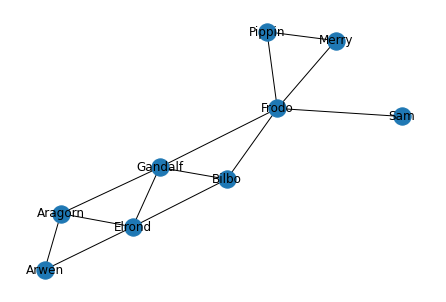

In [48]:
# Plot
SDA = nx.Graph(NERD) 
nx.draw(SDA, with_labels=True)

In [49]:
print ("A distancia entre Sam e Arwen é", dist_SA(NERD, "Sam", "Arwen"), "amiguinhos")

A distancia entre Sam e Arwen é 4 amiguinhos


fofo

<font color=&ldquo;blue&rdquo;>Ponto bônus: faça um código em Python que reporte um dos menores caminhos entre Sam e Arwen, mostrando todos os vértices visitados.



### A matriz de adjacência



A matriz de adjacência é uma forma de representar um grafo usando uma matriz. A matriz de adjacência $A$ de um grafo tem $n$ linhas e $n$ colunas, onde $n$ é o número de vértices do grafo. Para quaisquer dois vértices $u$ e $v$ do grafo, o valor de $A[u,v]$ vale 1 caso $u$ esteja conectado com $v$ ou vale 0 caso contrário. Sua tarefa é construir a matriz de adjacência do grafo do exercício anterior.

Essa questão vale apenas metade caso você faça a matriz &ldquo;na mão&rdquo;, literalmente escrevendo a matriz como uma lista de listas de Python. Se for resolver desta forma, não se esqueça de indicar com uma lista a ordem das linhas e colunas da sua matriz (ou seja, que personagem cada linha e coluna representam).

A questão vale a pontuação máxima caso você construa uma função que recebe um grafo qualquer na forma de dicionário e retorna a matriz de adjacência e a ordem das linhas e colunas. Não se esqueça de testar sua função com o grafo do exercício acima.



### Se for consumir grafos, opte pelos grafos orgânicos



O metano é um hidrocarboneto (composto orgânico) com 1 carbono ligado a 4 hidrogênios. Podemos representar o metano usando um grafo:



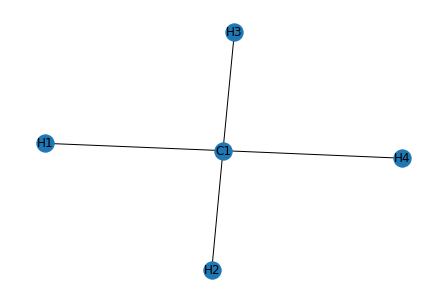

In [50]:
metano = {
    "C1": {"H1", "H2", "H3", "H4"},
    "H1": {"C1"},
    "H2": {"C1"},
    "H3": {"C1"},
    "H4": {"C1"},
}

m = nx.Graph(metano)
nx.draw(m, with_labels=True)

Aqui nós temos que tomar cuidado com a notação utilizada para diferenciar os átomos. A notação escolhida foi o símbolo do elemento químico seguido de um número natural. Cuidado! Não confunda `"H2"` com a molécula química $H_2$! Aqui o `"H2"` é apenas um único átomo de hidrogênio que demos o número 2 para diferenciar do `"H1"` e do `"H3"` e do `"H4"`.

Construa um grafo do hidrocarboneto propano e faça um plot dele. Em caso de dúvida sobre a fórmula química do propano, vá até o [grande repositório gratuito de informação da humanidade](https://pt.wikipedia.org/wiki/Propano).



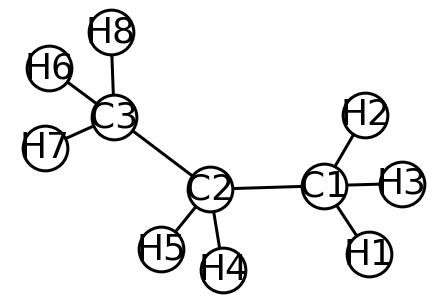

In [51]:
C3H8 = {
    "C1": {"H1", "H2", "H3", "C2"},
    "C2": {"C1", "H4", "H5", "C3"},
    "C3": {"C2", "H6", "H7", "H8"},
}

propaninho = nx.Graph(C3H8)
nx.draw(propaninho, **options)

<font color=&ldquo;blue&rdquo;>Ponto bônus: construa um grafo do benzeno e faça um plot dele.



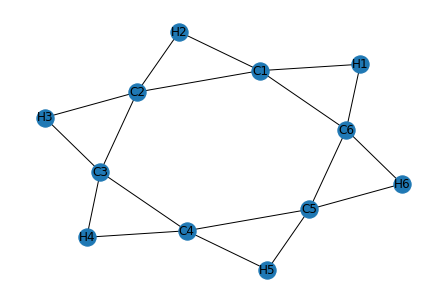

In [52]:
BENZENOOOO = {
    "C1": {"C2", "C6", "H1", "H2"},
    "C2": {"C1", "C3", "H2", "H3"},
    "C3": {"C2", "C4", "H3", "H4"},
    "C4": {"C3", "C5", "H4", "H5"},
    "C5": {"C4", "C6", "H5", "H6"},
    "C6": {"C5", "C1", "H6", "H1"},
}

benzeninho = nx.Graph(BENZENOOOO)
nx.draw(benzeninho, with_labels=True)

O ideal seria os hidrogênios ficarem para dentro =(

<font color=&ldquo;blue&rdquo;>Ponto bônus: construa um grafo de uma molécula biologicamente relevante que você aprendeu na disciplina da prof. Juliana. Escolha uma molécula composta por 5 ou mais átomos. Explique para o prof. de Lógica Computacional o que essa molécula faz pois ele provavelmente não sabe. Ah, não se esqueça de plotar sua molécula!



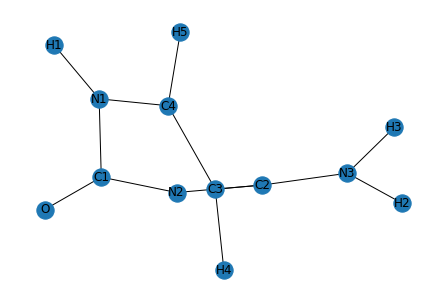

In [53]:
# A citosina é uma das bases nitrogenadas que compõe a molécula de DNA
# Ela é ligada à glicose e ao fosfato e faz par com a guanina
citosina = {
    "N1": {"C1", "C4", "H1"},
    "C1": {"N1", "N2", "O"}, 
    "N2": {"C1", "C2"},
    "C2": {"N2", "C3", "N3"},
    "C3": {"C2", "C4", "H4"},
    "C4": {"H5", "N1", "C3"},
    "N3": {"C2", "H2", "H3"},
}

DNA = nx.Graph(citosina)
nx.draw(DNA, with_labels=True)

### No meio do caminho tinha um vértice, tinha um vértice no meio do caminho



Crie uma função que recebe de entrada um grafo (representado por um dicionário de Python) e um vértice inicial. O algoritmo deve retornar para o usuário um dicionário onde as chaves são os vértices do grafo de entrada e os valores são as distâncias mínimas para chegar até esses vértices a partir do vértice inicial de entrada. Não se esqueça de testar sua função.



### Grafo de palavras



Em um grafo de palavras, os vértices são palavras válidas da língua portuguesa e as arestas ligam palavras que diferem em exatamente uma posição. Exemplo: um vizinho do vértice `pato` é o vértice `pano`, pois diferem em exatamente uma letra. No entanto, o vértice `laço` não pode ser vizinho do vértice `pato` pois diferem em mais de uma posição.

Crie um grafo de palavras considerando as palavras abaixo e faça o plot dele. Faça todas as conexões possíveis de todas as palavras no seu grafo.

-   moça
-   ralo
-   paço
-   mote
-   bota
-   moço
-   rato
-   rota
-   raio
-   laço
-   poço
-   maio
-   bote
-   paio

<font color=&ldquo;blue&rdquo;>Ponto bônus: identifique as duas palavras mais distantes neste grafo de palavras usando um algoritmo de Python (isto é, não é para fazer &ldquo;na mão&rdquo;). Se houver empate entre as palavras mais distantes, liste todas as duplas que encontrar.



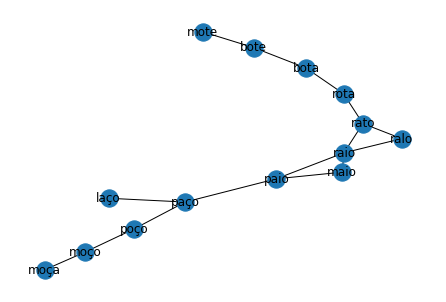

In [54]:
hm = { 
    "moça": {"moço"},
    "ralo": {"raio", "rato"},
    "paço": {"paio", "poço", "laço"},
    "mote": {"bote"},
    "bota": {"rota", "bote"},
    "moço": {"moça", "poço"},
    "rato": {"rota", "ralo", "raio"},
    "rota": {"rato", "bota"},
    "raio": {"ralo", "rato", "maio", "paio"},
    "laço": {"paço"},
    "poço": {"paço"},
    "maio": {"raio", "paio"},
    "bote": {"mote", "bota"},
    "paio": {"paço", "maio", "raio"},
}

aaaa = nx.Graph(hm)
nx.draw(aaaa, with_labels=True)

### Ordem, progresso e grafos



Faça o grafo dos estados do Brasil. Cada vértice do seu grafo deve ser um estado brasileiro assim como consta no mapa oficial no momento que você estiver lendo essa questão. As arestas do grafo do Brasil ligam estados que fazem fronteira. Não se esqueça de plotar seu grafo!



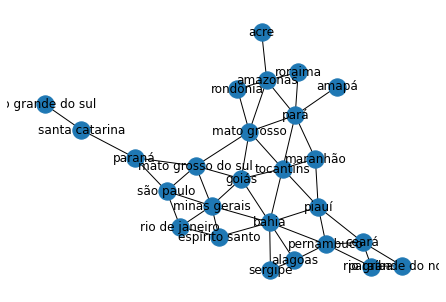

In [55]:
brasil = {
    "acre": {"amazonas"},
    "amazonas": {"acre", "rondônia", "roraima", "pará", "mato grosso"},
    "roraima": {"amazonas", "pará"},
    "rondônia": {"amazonas", "mato grosso"},
    "amapá": {"pará"},
    "pará": {"amazonas", "roraima", "mato grosso", "amapá", "maranhão", "tocantins"},
    "mato grosso": {"amazonas", "rondônia", "pará", "tocantins", "goiás", "mato grosso do sul"},
    "maranhão": {"pará", "tocantins", "piauí"},
    "tocantins": {"pará", "maranhão", "piauí", "bahia", "goiás", "mato grosso"},
    "goiás": {"mato grosso", "tocantins", "bahia", "minas gerais", "mato grosso do sul"},
    "mato grosso do sul": {"mato grosso", "goiás", "minas gerais", "são paulo", "paraná"},
    "piauí": {"maranhão", "tocantins", "bahia", "pernambuco", "ceará"},
    "ceará": {"piauí", "pernambuco", "paraíba", "rio grande do norte"},
    "rio grande do norte": {"ceará", "paraíba"},
    "paraíba": {"rio grande do norte", "ceará", "pernambuco"},
    "pernambuco": {"paraíba", "ceará", "piauí", "bahia", "alagoas"},
    "alagoas": {"pernambuco", "bahia", "sergipe"},
    "sergipe": {"bahia", "alagoas"},
    "bahia": {"sergipe", "alagoas", "pernambuco", "piauí", "tocantins", "goiás", "minas gerais", "espírito santo"},
    "minas gerais": {"espírito santo", "bahia", "goiás", "são paulo", "mato grosso do sul", "rio de janeiro"},
    "espírito santo": {"bahia", "minas gerais", "rio de janeiro"},
    "rio de janeiro": {"espírito santo", "minas gerais", "são paulo"},
    "são paulo": {"rio de janeiro", "minas gerais", "mato grosso do sul", "paraná"},
    "paraná": {"são paulo", "mato grosso do sul", "santa catarina"},
    "santa catarina": {"paraná", "rio grande do sul"},
    "rio grande do sul": {"santa catarina"},
}

coringando = nx.Graph(brasil)
nx.draw(coringando, with_labels=True)

<font color=&ldquo;blue&rdquo;>Ponto bônus: identifique quais são os estados mais distantes do grafo do Brasil. Faça isso usando um algoritmo em Python (ou seja, não é para fazer &ldquo;na mão&rdquo;).



### Grafo aleatório



Faça uma função que não recebe nenhum argumento e retorna um grafo contendo 6 vértices. Para cada conjunto de dois vértices do seu grafo, sua função deve escolher de maneira aleatória (use o módulo `random`) se estes vértices estão conectados entre si ou não. Gere 3 grafos com sua função e faça um plot de cada um deles.



### Grafo de Petersen



Sua tarefa é buscar informações sobre o grafo de Petersen e construir ele usando um dicionário de Python. Não se esqueça de plotar seu grafo!



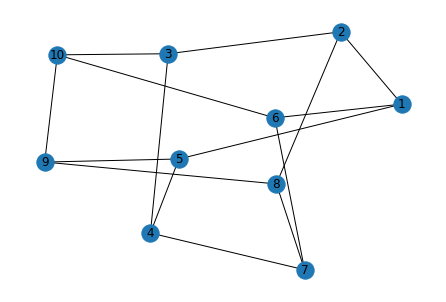

In [56]:
peter = {
    "1": {"2", "5", "6"},
    "2": {"1", "3", "8"},
    "3": {"2", "4", "10"},
    "4": {"3", "5", "7"},
    "5": {"1", "4", "9"},
    "6": {"1", "7", "10"},
    "7": {"4", "6", "8"},
    "8": {"2", "7", "9"},
    "9": {"5", "8", "10"},
    "10": {"3", "6", "9"},
}

peterzinho = nx.Graph(peter)
nx.draw(peterzinho, with_labels=True)